# Setup for Packages in R

In [3]:
#install.packages("BART")
library(BART)
library(caret)
library(tidyverse)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘caret’

The following object is masked from ‘package:survival’:

    cluster

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ──────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ─────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks nlme::collapse()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ purrr::lift()     masks caret::lift()


In [7]:
happiness.df <- read_csv(file="datasets/world-happiness/happiness.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  Country = col_character(),
  Region = col_character(),
  `Happiness Rank` = col_double(),
  `Happiness Score` = col_double(),
  `Economy (GDP per Capita)` = col_double(),
  Family = col_double(),
  `Health (Life Expectancy)` = col_double(),
  Freedom = col_double(),
  `Trust (Government Corruption)` = col_double(),
  Generosity = col_double(),
  `Dystopia Residual` = col_double()
)


In [51]:
colnames(happiness.df)[-(1:3)]

[1] "Happiness Rank"                "Happiness Score"              
[3] "Economy (GDP per Capita)"      "Family"                       
[5] "Health (Life Expectancy)"      "Freedom"                      
[7] "Trust (Government Corruption)" "Generosity"                   
[9] "Dystopia Residual"

In [63]:
happiness.filtered <- happiness.df %>% select(-c(X1, Country,Region,"Happiness Rank","Happiness Score"))

In [69]:
happiness.df[["Happiness Score"]]

[1] 7.587 7.561 7.527 7.522 7.427 7.406 7.378 7.364 7.286 7.284 7.278 7.226
 [13] 7.200 7.187 7.119 6.983 6.946 6.940 6.937 6.901 6.867 6.853 6.810 6.798
 [25] 6.786 6.750 6.670 6.611 6.575 6.574 6.505 6.485 6.477 6.455 6.411 6.329
 [37] 6.302 6.298 6.295 6.269 6.168 6.130 6.123 6.003 5.995 5.987 5.984 5.975
 [49] 5.960 5.948 5.890 5.889 5.878 5.855 5.848 5.833 5.828 5.824 5.813 5.791
 [61] 5.770 5.759 5.754 5.716 5.709 5.695 5.689 5.605 5.589 5.548 5.477 5.474
 [73] 5.429 5.399 5.360 5.332 5.286 5.268 5.253 5.212 5.194 5.192 5.192 5.140
 [85] 5.129 5.124 5.123 5.102 5.098 5.073 5.057 5.013 5.007 4.971 4.959 4.949
 [97] 4.898 4.885 4.876 4.874 4.867 4.857 4.839 4.800 4.788 4.786 4.739 4.715
[109] 4.694 4.686 4.681 4.677 4.642 4.633 4.610 4.571 4.565 4.550 4.518 4.517
[121] 4.514 4.512 4.507 4.436 4.419 4.369 4.350 4.332 4.307 4.297 4.292 4.271
[133] 4.252 4.218 4.194 4.077 4.033 3.995 3.989 3.956 3.931 3.904 3.896 3.845
[145] 3.819 3.781 3.681 3.678 3.667 3.656 3.655 3.587 3.575 3.465 3.340 3.006
[157] 2.905 2.839 7.526 7.509 7.501 7.498 7.413 7.404 7.339 7.334 7.313 7.291
[169] 7.267 7.119 7.104 7.087 7.039 6.994 6.952 6.929 6.907 6.871 6.778 6.739
[181] 6.725 6.705 6.701 6.650 6.596 6.573 6.545 6.488 6.481 6.478 6.474 6.379
[193] 6.379 6.375 6.361 6.355 6.324 6.269 6.239 6.218 6.168 6.084 6.078 6.068
[205] 6.005 5.992 5.987 5.977 5.976 5.956 5.921 5.919 5.897 5.856 5.835 5.835
[217] 5.822 5.813 5.802 5.771 5.768 5.743 5.658 5.648 5.615 5.560 5.546 5.538
[229] 5.528 5.517 5.510 5.488 5.458 5.440 5.401 5.389 5.314 5.303 5.291 5.279
[241] 5.245 5.196 5.185 5.177 5.163 5.161 5.155 5.151 5.145 5.132 5.129 5.123
[253] 5.121 5.061 5.057 5.045 5.033 4.996 4.907 4.876 4.875 4.871 4.813 4.795
[265] 4.793 4.754 4.655 4.643 4.635 4.575 4.574 4.513 4.508 4.459 4.415 4.404
[277] 4.395 4.362 4.360 4.356 4.324 4.276 4.272 4.252 4.236 4.219 4.217 4.201
[289] 4.193 4.156 4.139 4.121 4.073 4.028 3.974 3.956 3.916 3.907 3.866 3.856
[301] 3.832 3.763 3.739 3.739 3.724 3.695 3.666 3.622 3.607 3.515 3.484 3.360
[313] 3.303 3.069 2.905 7.537 7.522 7.504 7.494 7.469 7.377 7.316 7.314 7.284
[325] 7.284 7.213 7.079 7.006 6.993 6.977 6.951 6.891 6.863 6.714 6.652 6.648
[337] 6.635 6.609 6.599 6.578 6.572 6.527 6.454 6.454 6.452 6.442 6.424 6.422
[349] 6.403 6.375 6.357 6.344 6.168 6.105 6.098 6.087 6.084 6.071 6.008 6.003
[361] 5.973 5.971 5.964 5.963 5.956 5.920 5.902 5.872 5.850 5.838 5.838 5.825
[373] 5.823 5.822 5.819 5.810 5.758 5.715 5.629 5.621 5.611 5.569 5.525 5.500
[385] 5.493 5.472 5.430 5.395 5.336 5.324 5.311 5.293 5.279 5.273 5.269 5.262
[397] 5.250 5.237 5.235 5.234 5.230 5.227 5.225 5.195 5.182 5.181 5.175 5.151
[409] 5.074 5.074 5.041 5.011 5.004 4.962 4.955 4.829 4.805 4.775 4.735 4.714
[421] 4.709 4.695 4.692 4.644 4.608 4.574 4.553 4.550 4.545 4.535 4.514 4.497
[433] 4.465 4.460 4.440 4.376 4.315 4.292 4.291 4.286 4.280 4.190 4.180 4.168
[445] 4.139 4.120 4.096 4.081 4.032 4.028 3.970 3.936 3.875 3.808 3.795 3.794
[457] 3.766 3.657 3.644 3.603 3.593 3.591 3.533 3.507 3.495 3.471 3.462 3.349
[469] 2.905 2.693

In [87]:
options(repr.plot.width = 8, repr.plot.height = 3)

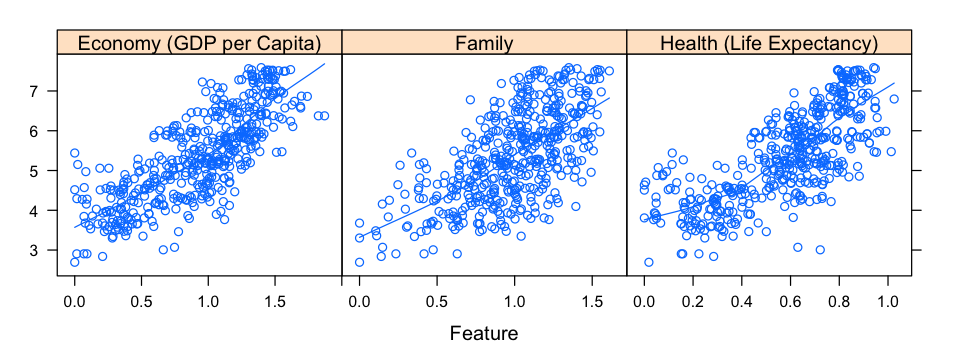

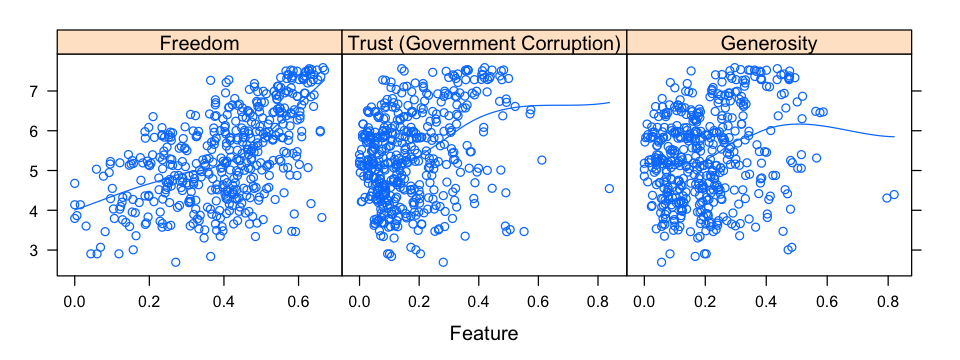

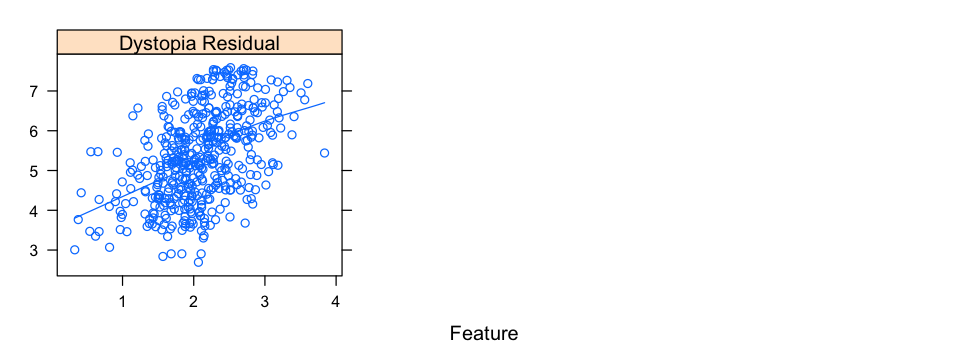

In [89]:
featurePlot(x = happiness.filtered, y=happiness.df[["Happiness Score"]],  plot = "scatter",layout = c(3, 1), type = c("p", "smooth"))